In [29]:
import json
import pandas as pd

N = 32
thread_counts = ["1", "2", "4", "8"]
builds = ["thrust_part", "mpi_part"]
bounds = [100_000, 500_000, 1_000_000, 1_500_000, 2_000_000, 4_000_000]
with open('results.json', 'r') as f:
    results = json.load(f)
    

In [30]:
# t_n is the time elapsed using n threads, s_n is the speedup using n threads compared to serial
header = ["bound", "build", "t1", "t2", "t4", "t8", "s2", "s4", "s8" ]
speedupds = ["2", "4", "8"]

with open("int.csv", "w") as f:
    f.write(",".join(header) + "\n")
    build = "serial"
    thread_count = "1"
    for bound in bounds:
        # don't use the df, use the results directly
        row = [bound, build]
        for thread_count in thread_counts:
            row.append(results[build]["1"][str(bound)]["avg_elapsed"])
        for speedupd in speedupds:
            row.append(0.0)
        f.write(",".join([str(x) for x in row]) + "\n")

with open("int.csv", "a") as f:
    for build in builds:
        for bound in bounds:
            row = [bound, build]
            # row = [bound, build, "t1", "t2", "t4", "t8", "s2", "s4", "s8]
            serial_result = results["serial"]["1"][str(bound)]["avg_elapsed"]
            # don't use the df, use the results directly
            for thread_count in thread_counts:
                row.append(results[build][thread_count][str(bound)]["avg_elapsed"])
            for speedupd in speedupds:
                row.append(serial_result / results[build][speedupd][str(bound)]["avg_elapsed"])
            f.write(",".join([str(x) for x in row]) + "\n")
            


In [31]:
df = pd.read_csv("int.csv")


In [32]:
df

,bound,build,t1,t2,t4,t8,s2,s4,s8
0,100000,serial,0.007711,0.007711,0.007711,0.007711,0.000000,0.000000,0.000000
1,500000,serial,0.061751,0.061751,0.061751,0.061751,0.000000,0.000000,0.000000
2,1000000,serial,0.156613,0.156613,0.156613,0.156613,0.000000,0.000000,0.000000
3,1500000,serial,0.271450,0.271450,0.271450,0.271450,0.000000,0.000000,0.000000
4,2000000,serial,0.401681,0.401681,0.401681,0.401681,0.000000,0.000000,0.000000
5,4000000,serial,1.045982,1.045982,1.045982,1.045982,0.000000,0.000000,0.000000
6,100000,thrust_part,0.003421,0.003964,0.004872,0.007122,1.945334,1.582695,1.082697
7,500000,thrust_part,0.018061,0.014935,0.014034,0.015995,4.134598,4.400137,3.860584
8,1000000,thrust_part,0.037803,0.030616,0.026552,0.028261,5.115334,5.898370,5.541578
9,1500000,thrust_part,0.057671,0.046317,0.039616,0.040596,5.860644,6.852024,6.686686


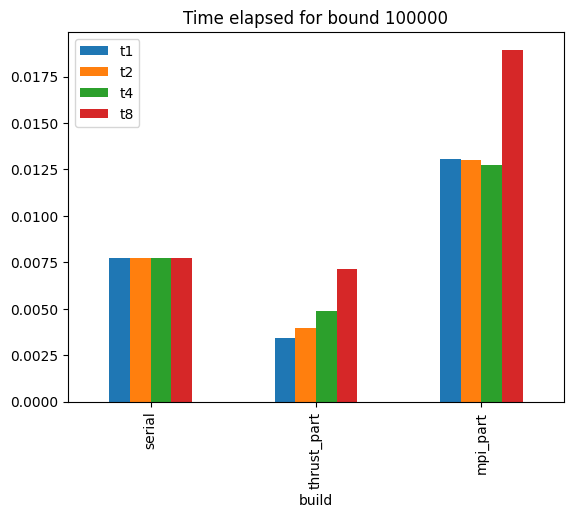

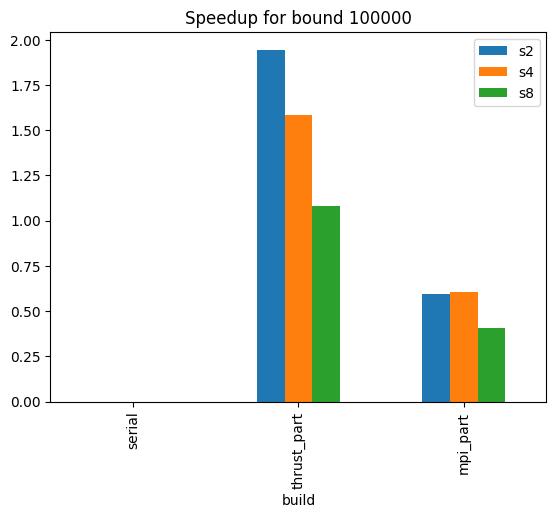

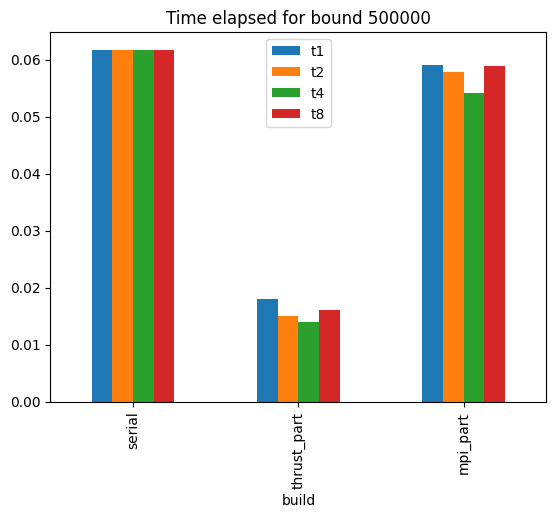

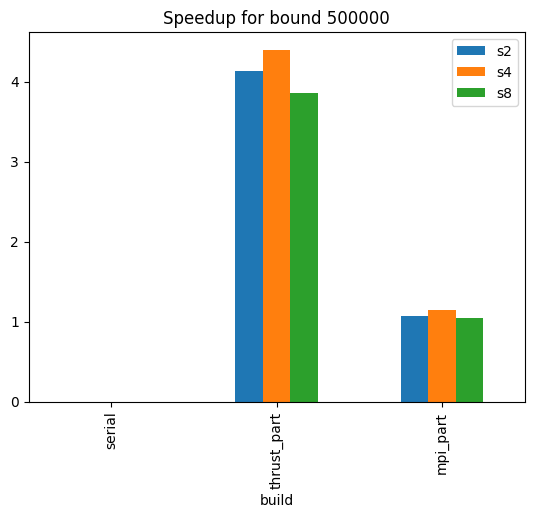

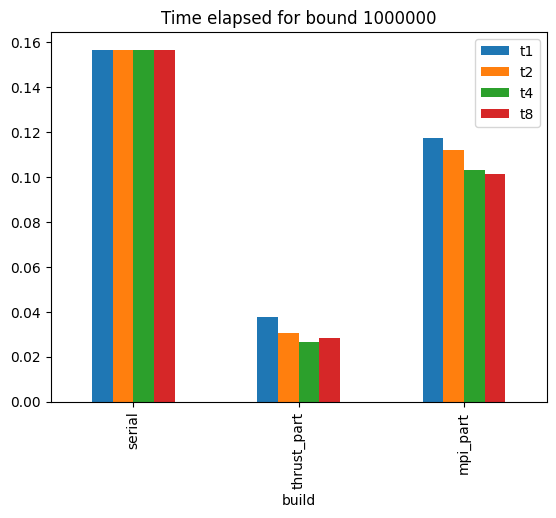

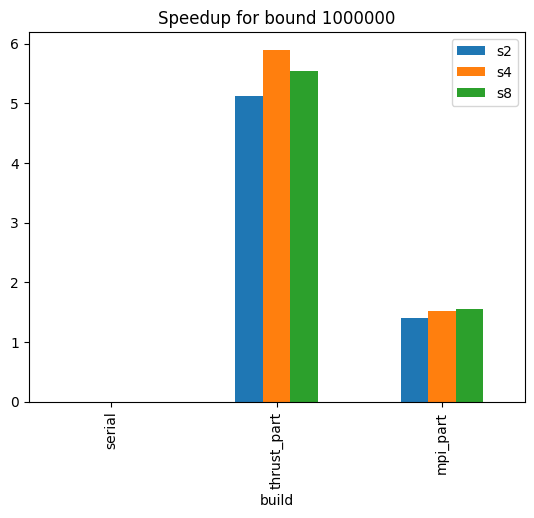

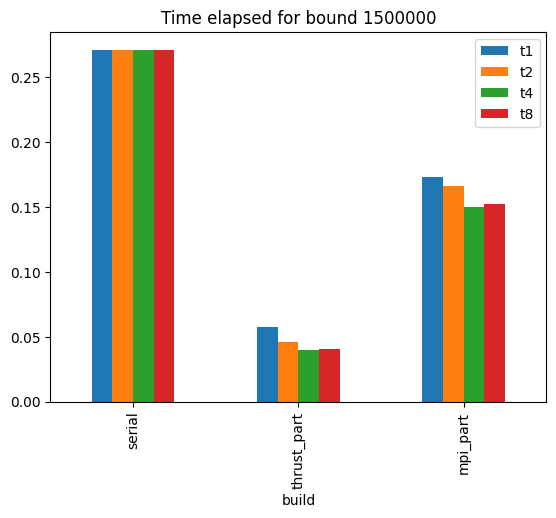

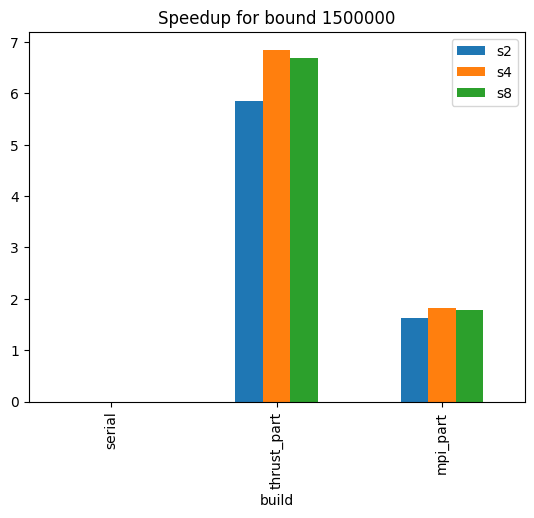

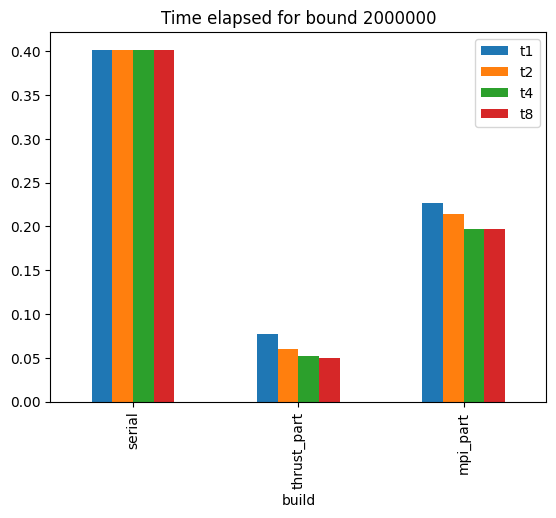

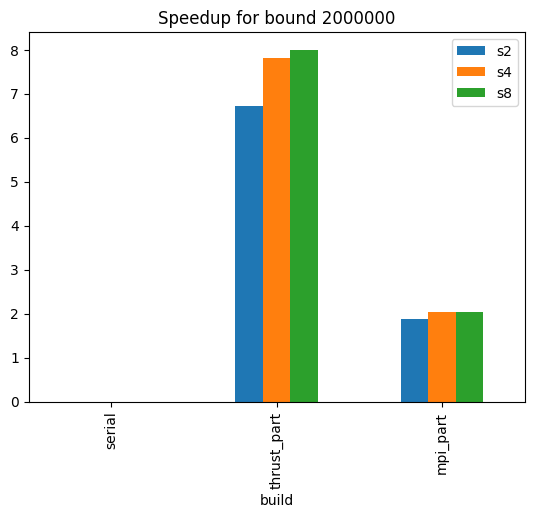

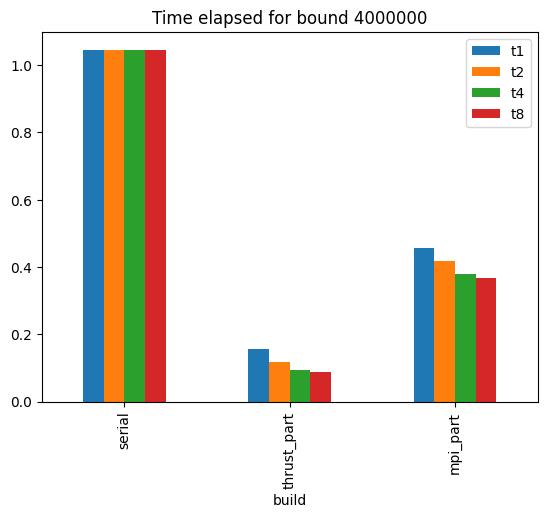

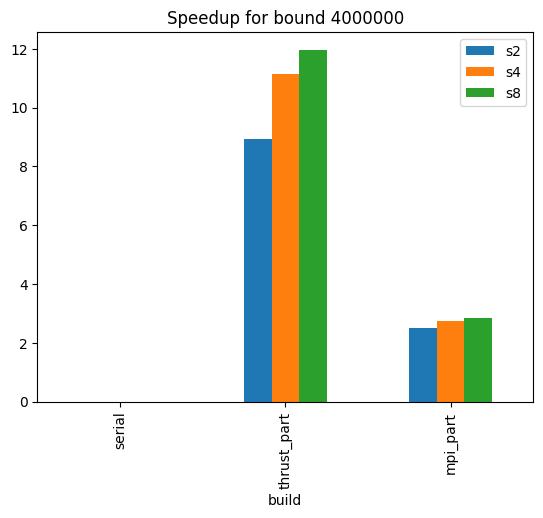

In [34]:
# plot for each bound, thread count vs time elapsed for each build
# save each plot to a file with the bound in the, first one is prefixed with time the other with speedup
for bound in bounds:
    df[df["bound"] == bound].plot(x="build", y=["t1", "t2", "t4", "t8"], kind="bar", title=f"Time elapsed for bound {bound}")
    # plt.savefig(f"bound_{bound}_time.png")
    df[df["bound"] == bound].plot(x="build", y=["s2", "s4", "s8"], kind="bar", title=f"Speedup for bound {bound}")
    # plt.savefig(f"bound_{bound}_speedup.png")

# Conclusion
The benchmark results reveal clear distinctions between the serial, Thrust CUDA, and MPI implementations:

## Serial Implementation:
Shows a consistent runtime across all dataset sizes, maintaining nearly identical timings regardless of the data magnitude.

## Thrust CUDA Implementation:
Demonstrates a performance advantage over the serial implementation for all dataset sizes.
Exhibits a non-linear increase in runtime as the dataset size grows, with observable escalations in execution times.

## MPI Implementation:
Initially performs on par with or slightly better than the serial implementation for smaller datasets.
However, unlike the Thrust CUDA implementation, MPI struggles to surpass its performance across all dataset sizes.
Shows competitive performance, especially for larger datasets, but does not consistently outperform the Thrust CUDA implementation.

## Parallel Implementations (Thrust CUDA and MPI):
Both parallel implementations display decreasing runtimes with increased parallelization (threads or processes).
However, as the dataset size increases, the improvement in runtime diminishes, reaching a plateau or experiencing marginal enhancements beyond a certain level of parallelization.

## Scalability:
Both the Thrust CUDA and MPI implementations demonstrate limitations in scalability beyond a specific dataset size.
The performance gains from parallelization taper off or even slightly regress as more resources are utilized, emphasizing the challenge of achieving substantial speedups for larger datasets.

# Why is Thrust CUDA faster than MPI?

## Communication Overhead:
MPI heavily relies on message passing between different processes, which introduces communication overhead, especially noticeable when handling larger datasets or intricate communication patterns.
Thrust CUDA, on the other hand, benefits from shared memory and streamlined communication within the GPU, significantly reducing communication overhead compared to MPI.

## Code Optimization:
Thrust CUDA leverages highly optimized libraries and compilers that generate efficient GPU code, surpassing hand-written CPU-based MPI code in many scenarios.
Hand-tuned MPI implementations might suffer from suboptimal code structures, inefficient algorithms, or unoptimized communication patterns, limiting their ability to match the performance gains achieved by Thrust CUDA.

## Architecture-Specific Optimization:
Thrust CUDA is specifically designed to harness the parallel processing power of GPUs, capitalizing on their architecture's inherent strengths.
MPI, while offering portability across various architectures, might not fully exploit the specialized capabilities of GPUs, leading to performance gaps, especially when dealing with compute-intensive tasks suitable for GPU acceleration.

## Resource Utilization:
Thrust CUDA maximizes the available GPU resources and computational cores, optimizing memory access and thread utilization, resulting in more efficient processing.
MPI implementations may struggle to efficiently utilize distributed resources, leading to uneven load balancing, increased synchronization overhead, and less efficient resource utilization.

## Toolchain and Development Complexity:
Thrust CUDA benefits from a comprehensive toolchain, including optimized compilers and libraries, which streamline development and produce highly efficient GPU code with less manual intervention.
MPI implementations often require manual optimization, complex communication handling, and a deeper understanding of parallel programming paradigms, making it more challenging to achieve the same level of efficiency as Thrust CUDA.


In conclusion, while MPI and Thrust CUDA represent distinct parallelization paradigms, the performance discrepancies often stem from communication overhead, suboptimal code in MPI implementations, and the unparalleled efficiency of Thrust CUDA's compiler-generated code. Bridging this gap requires meticulous optimization of MPI code, considering communication patterns, and exploring hybrid approaches that combine the strengths of MPI and GPU acceleration to achieve optimal performance across diverse computational tasks.